In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import numpy as np
from xgboost import train

In [2]:
df = pd.read_csv('datasets/BostonHousing.csv')

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

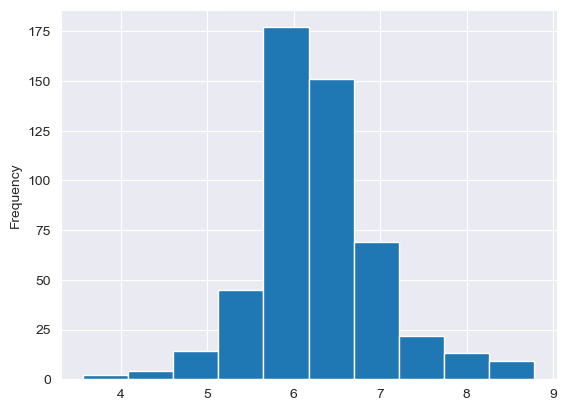

In [7]:
df.rm.plot.hist()
plt.show()

In [13]:
df.rm = df.rm.fillna(value=df.rm.mean())

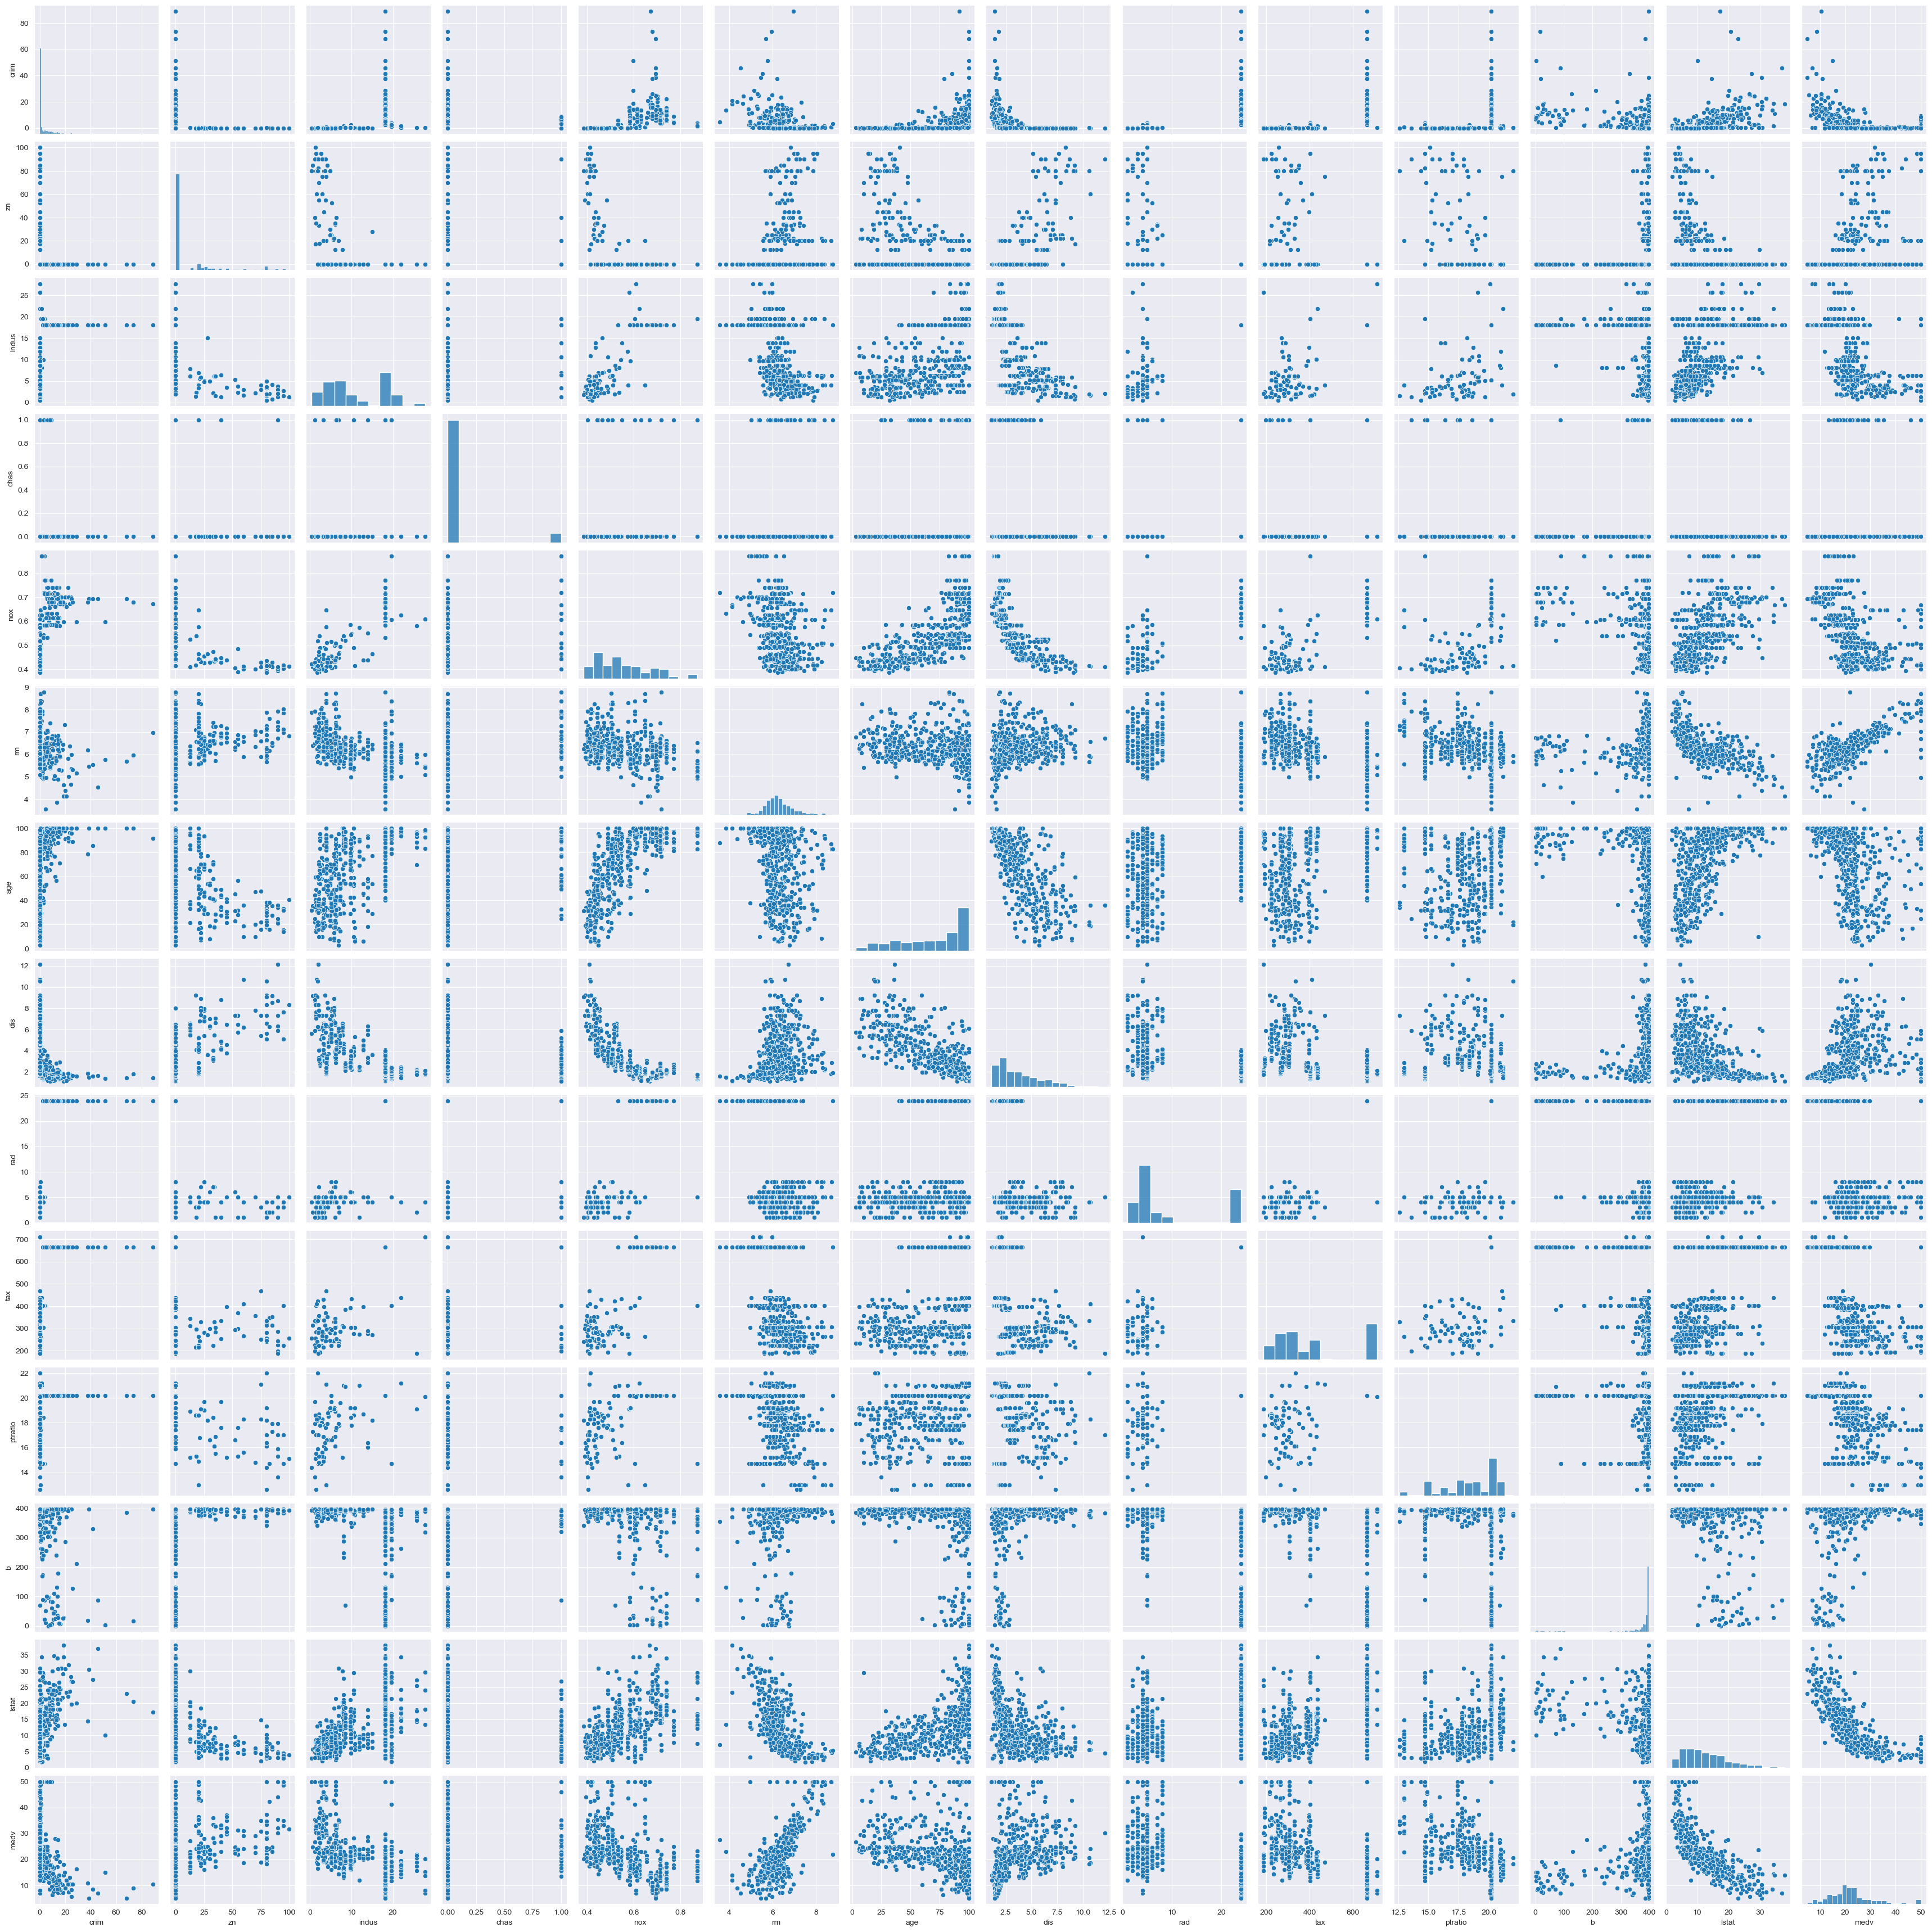

In [15]:
sns.pairplot(df)

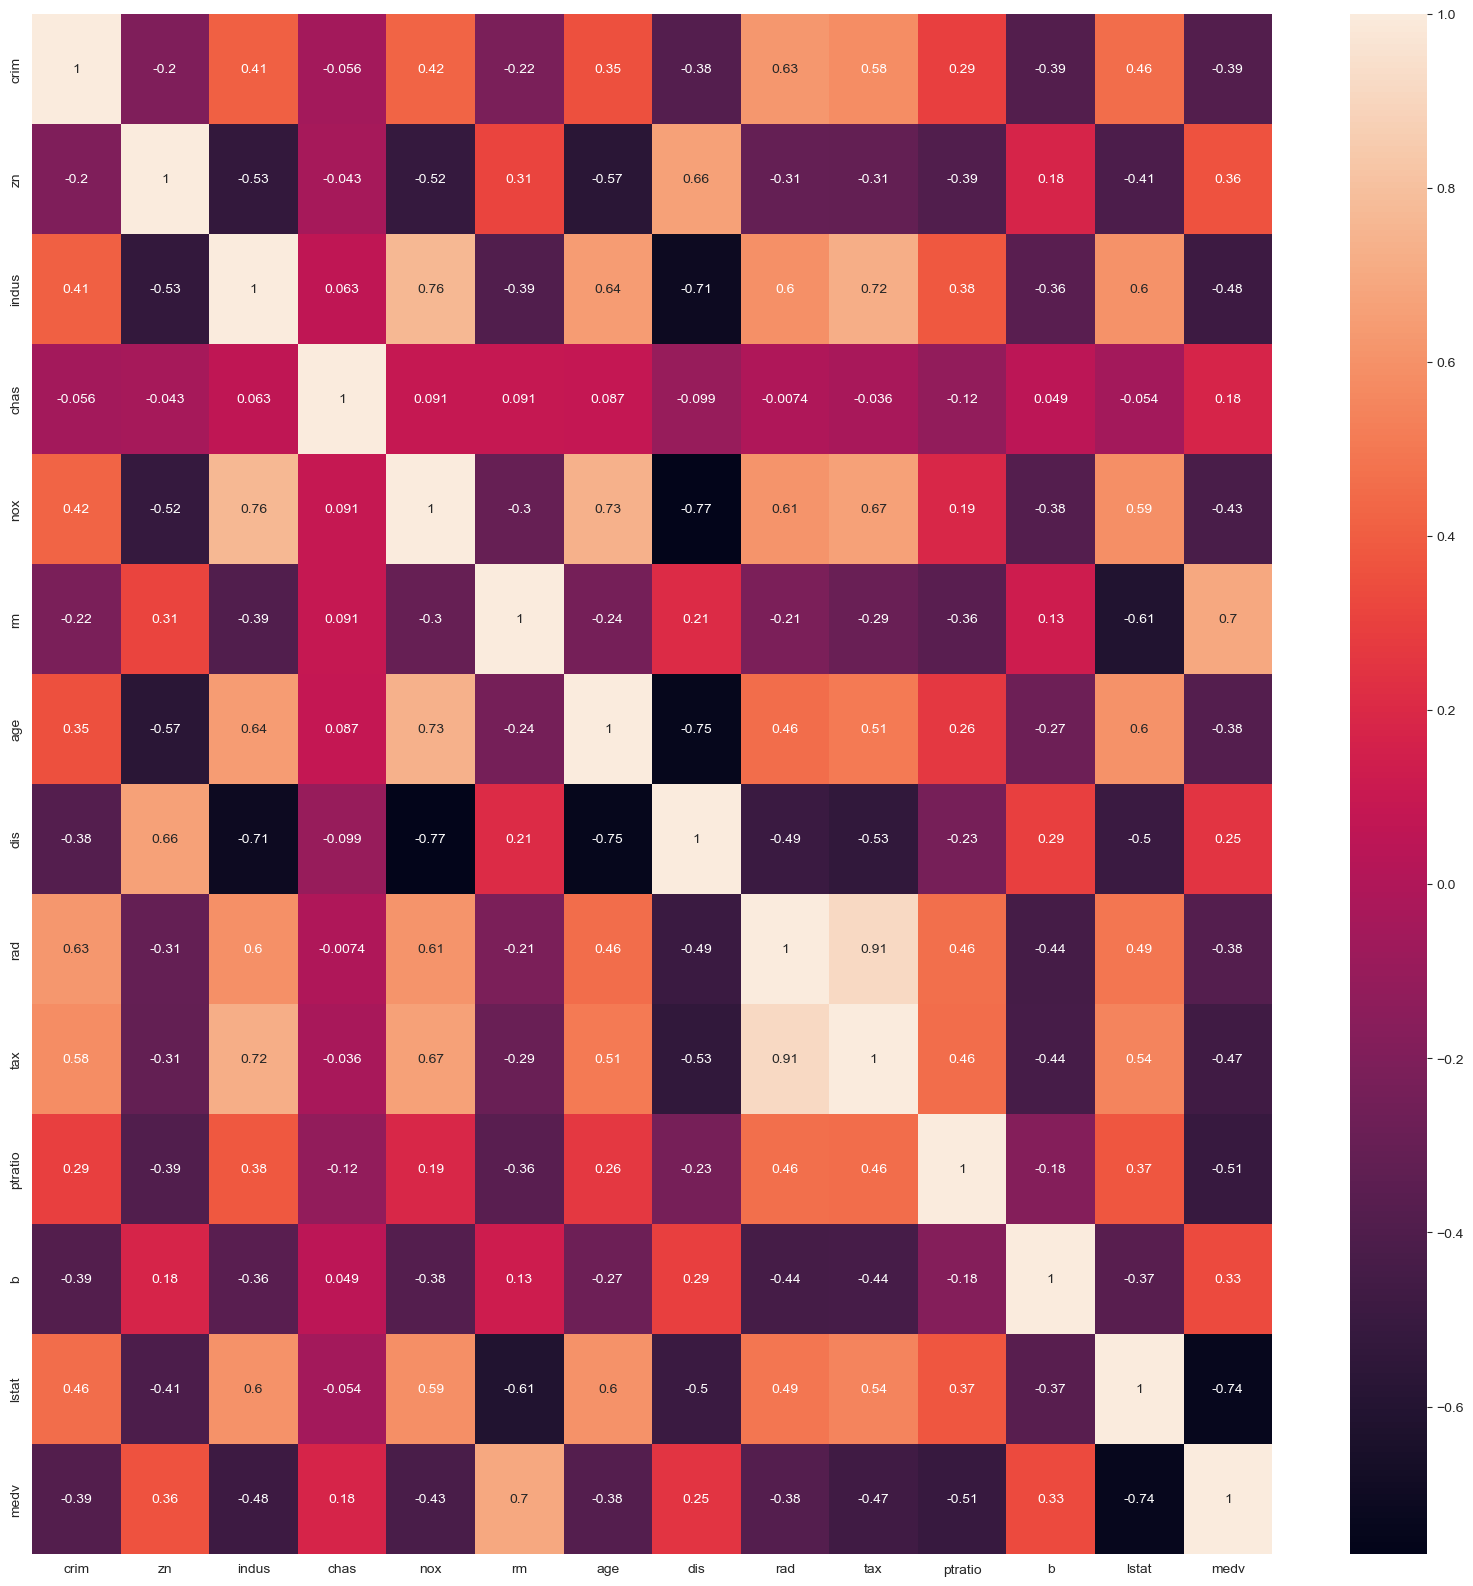

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
# gi trgame koreliranite features - vo nasiov slucaj features so visoka korelacija se tax, rad - eden od niv 

features_without_high_corr = ['dis', 'b', 'lstat', 'tax', 'ptratio']

In [31]:
x = df[features_without_high_corr]
y = df['medv']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
x_train

,dis,b,lstat,tax,ptratio
191,6.4798,389.71,4.69,398,15.2
85,4.4377,392.30,6.53,247,18.5
499,2.3999,395.77,15.10,391,19.2
482,3.4106,395.28,7.01,666,20.2
353,12.1265,384.46,4.50,187,17.0
...,...,...,...,...,...
253,8.9067,396.90,3.54,330,19.1
363,1.9047,353.04,14.64,666,20.2
81,5.4007,395.63,7.22,281,19.0
11,6.2267,396.90,13.27,311,15.2


In [33]:
scaler = StandardScaler()

x_train[features_without_high_corr] = scaler.fit_transform(x_train[features_without_high_corr])
x_test[features_without_high_corr] = scaler.transform(x_test[features_without_high_corr])

In [34]:
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

In [35]:
y_train

array([[ 9.86009602e-01],
       [-9.32323075e-01],
       [-3.00271268e-01],
       [-1.38695683e+00],
       [-2.89182640e-01],
       [-3.66803037e-01],
       [ 1.28540256e+00],
       [-1.90812236e+00],
       [ 1.65451116e-01],
       [-1.33941845e-01],
       [ 2.87426026e-01],
       [ 2.31982885e-01],
       [ 1.46282061e+00],
       [-1.56119102e-01],
       [-1.56437488e+00],
       [-4.52328199e-02],
       [-8.21436793e-01],
       [-9.54500331e-01],
       [ 3.08176033e+00],
       [ 2.76337398e-01],
       [ 1.65451116e-01],
       [-8.95873327e-02],
       [-8.54702678e-01],
       [-2.89182640e-01],
       [ 1.58479552e+00],
       [-6.10752858e-01],
       [ 1.10798451e+00],
       [-2.33739499e-01],
       [-4.55512063e-01],
       [-6.32930114e-01],
       [-3.66803037e-01],
       [-5.63214481e-02],
       [-1.89384986e-01],
       [-8.10348165e-01],
       [ 1.65451116e-01],
       [-9.32323075e-01],
       [-2.44828127e-01],
       [ 1.40737747e+00],
       [-9.8

In [36]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(x_test)

In [38]:
y_pred = scaler.inverse_transform(y_pred)

In [39]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(4.218271875800134, 36.3229158779845, 0.6159859204505318)